# Module 3 Lesson 6

_This demonstration is meant to be used in parallel with the course content. To make full use of this, have both open and when you get to an example graph in the lesson, find the corresponding code here and play around with the numbers and variables to see how it changes things._

In [1]:
# Read data from csv
import pandas as pd
import numpy as np

imu_data = pd.read_csv('./data/imu_data.csv')

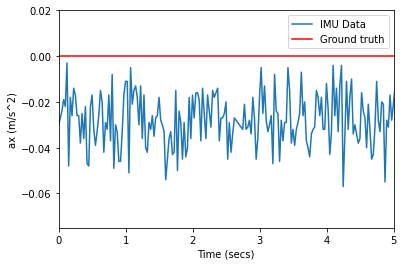

In [2]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

time = (imu_data['field.header.stamp'] - min(imu_data['field.header.stamp']))*1e-9
r = R.from_quat(np.transpose([imu_data['field.orientation.x'], imu_data['field.orientation.y'], imu_data['field.orientation.z'], imu_data['field.orientation.w']]))
(rot_roll, rot_pitch, rot_yaw) = np.transpose(r.as_euler('xyz', degrees=True))

acc_x = imu_data['field.linear_acceleration.x']
acc_y = imu_data['field.linear_acceleration.y']
acc_z = imu_data['field.linear_acceleration.z']

ideal = time.copy() * 0

fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, label="IMU Data")
ax.plot(time, ideal, 'r', label="Ground truth")
ax.set_ylim(-0.075, 0.02)
ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Simple Moving Average

In [3]:
k = 10

simple_filtered_x = acc_x.copy()
window = np.zeros(k)
for i in range(len(acc_x)):
  if i>=k-1:
    simple_filtered_x[i] = sum(acc_x[i-k+1:i+1])/k
  else:
    simple_filtered_x[i] = sum(acc_x[:i+1])/len(acc_x[:i+1])

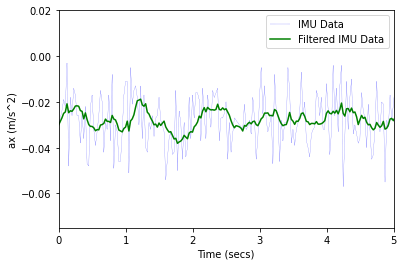

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, simple_filtered_x, 'g', label="Filtered IMU Data")
ax.set_ylim(-0.075, 0.02)
ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Cumulative Moving Average

In [5]:
cumulative_filtered_x = acc_x.copy()
window = np.zeros(k)
cumulative_filtered_x = np.cumsum(acc_x)/np.arange(1,len(acc_x) + 1)

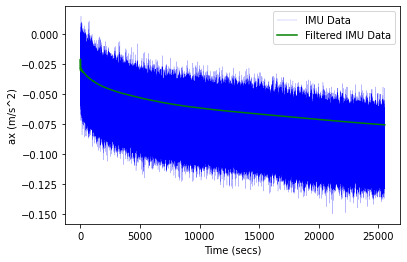

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, cumulative_filtered_x, 'g', label="Filtered IMU Data")
# ax.set_ylim(-0.075, 0.02)
# ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Exponential Moving Average

In [7]:
alpha = 0.1

exp_filtered_x = acc_x.copy()
for i in range(1, len(acc_x)):
  exp_filtered_x[i] = alpha * acc_x[i] + (1-alpha) * exp_filtered_x[i-1]

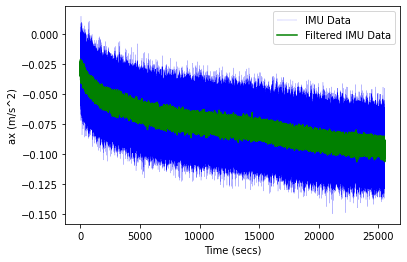

In [8]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, exp_filtered_x, 'g', label="Filtered IMU Data")
# ax.set_ylim(-0.075, 0.02)
# ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Moving Median Filter

/home/adarsh/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/adarsh/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


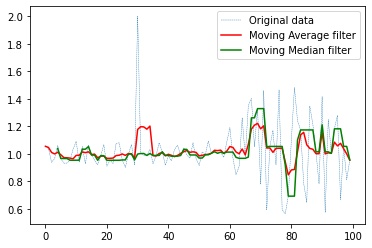

In [9]:
smooth_data = np.random.uniform(low=0.9, high=1.1, size=(100,))
smooth_data[30] = 2
smooth_data[60:] = (smooth_data[60:] - 1)*5 + 1
x_axis = np.arange(0,len(smooth_data))

mean_filtered = smooth_data.copy()
k = 5
window = np.zeros(k)
for i in range(len(smooth_data)):
  if i>=k-1:
    mean_filtered[i] = sum(smooth_data[i-k+1:i+1])/k
  else:
    mean_filtered[i] = sum(smooth_data[:i+1])/len(smooth_data[:i+1])

median_filtered = smooth_data.copy()
k = 5
window = np.zeros(k)
for i in range(len(smooth_data)):
  median_filtered[i] = np.median(smooth_data[i-k+1:i+1])

fig, ax = plt.subplots(1, 1)
ax.plot(x_axis, smooth_data, '--', linewidth=0.4, label="Original data")
ax.plot(x_axis, mean_filtered, 'r', label="Moving Average filter")
ax.plot(x_axis, median_filtered, 'g', label="Moving Median filter")
ax.legend()
plt.show()